In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings('ignore')



In [96]:
biao1=r'D:\code\数学建模模版\数据集\竞赛发布数据\表1-患者列表及临床信息.xlsx'
biao2=r'D:\code\数学建模模版\数据集\竞赛发布数据\表2-患者影像信息血肿及水肿的体积及位置.xlsx'
biao3=r'D:\code\数学建模模版\数据集\竞赛发布数据\表3-患者影像信息血肿及水肿的形状及灰度分布.xlsx'
biao4=r'D:\code\数学建模模版\数据集\竞赛发布数据\1a.xlsx'
biao11=pd.read_excel(biao1)
biao21=pd.read_excel(biao2)
biao31=pd.read_excel(biao3,sheet_name="Hemo")
biao41=pd.read_excel(biao4)



In [97]:
biao12=biao11.iloc[:100,4:23]
biao22=biao21.iloc[:100,2:24]
biao12


,年龄,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,房颤史,冠心病史,吸烟史,饮酒史,发病到首次影像检查时间间隔,血压,脑室引流,止血治疗,降颅压治疗,降压治疗,镇静、镇痛治疗,止吐护胃,营养神经
0,43,女,0,0,0,0,0,0,0,0,2.5,180/90,0,1,1,1,1,1,1
1,58,男,0,1,0,0,0,0,0,0,3.0,199/120,0,1,1,1,0,1,1
2,78,男,0,1,0,0,0,0,0,0,2.0,199/120,0,1,1,1,1,1,1
3,70,男,2,1,1,0,0,0,0,0,1.0,186/99,0,1,1,1,0,0,0
4,51,男,0,0,0,0,0,0,0,0,5.0,135/92,0,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,93,女,0,0,0,0,0,0,0,0,1.0,181/76,0,0,0,1,1,1,1
96,83,女,0,1,0,0,0,0,0,0,3.0,170/79,0,1,1,1,1,1,1
97,82,男,0,1,1,1,1,1,1,0,2.5,200/100,0,1,1,1,1,1,1
98,53,男,0,1,0,0,0,0,0,0,3.0,159/91,1,1,1,1,1,1,1


In [98]:
j=0
for i in biao12['性别']:
    if i=='男':
        biao12['性别'][j]=0
    else:
        biao12['性别'][j]=1
    j=j+1


In [99]:
biao12

,年龄,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,房颤史,冠心病史,吸烟史,饮酒史,发病到首次影像检查时间间隔,血压,脑室引流,止血治疗,降颅压治疗,降压治疗,镇静、镇痛治疗,止吐护胃,营养神经
0,43,1,0,0,0,0,0,0,0,0,2.5,180/90,0,1,1,1,1,1,1
1,58,0,0,1,0,0,0,0,0,0,3.0,199/120,0,1,1,1,0,1,1
2,78,0,0,1,0,0,0,0,0,0,2.0,199/120,0,1,1,1,1,1,1
3,70,0,2,1,1,0,0,0,0,0,1.0,186/99,0,1,1,1,0,0,0
4,51,0,0,0,0,0,0,0,0,0,5.0,135/92,0,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,93,1,0,0,0,0,0,0,0,0,1.0,181/76,0,0,0,1,1,1,1
96,83,1,0,1,0,0,0,0,0,0,3.0,170/79,0,1,1,1,1,1,1
97,82,0,0,1,1,1,1,1,1,0,2.5,200/100,0,1,1,1,1,1,1
98,53,0,0,1,0,0,0,0,0,0,3.0,159/91,1,1,1,1,1,1,1


In [100]:
biao12['血压']

0      180/90
1     199/120
2     199/120
3      186/99
4      135/92
       ...   
95     181/76
96     170/79
97    200/100
98     159/91
99     152/80
Name: 血压, Length: 100, dtype: object

In [101]:
high=[]
low=[]

for i in biao12['血压']:
    a,b=str(i).split('/')
    high.append(int(a))
    low.append(int(b))

In [102]:
list1=pd.DataFrame(high)
list2=pd.DataFrame(low)
biao12['高压']=list1
biao12['低压']=list2
biao12

,年龄,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,房颤史,冠心病史,吸烟史,饮酒史,...,血压,脑室引流,止血治疗,降颅压治疗,降压治疗,镇静、镇痛治疗,止吐护胃,营养神经,高压,低压
0,43,1,0,0,0,0,0,0,0,0,...,180/90,0,1,1,1,1,1,1,180,90
1,58,0,0,1,0,0,0,0,0,0,...,199/120,0,1,1,1,0,1,1,199,120
2,78,0,0,1,0,0,0,0,0,0,...,199/120,0,1,1,1,1,1,1,199,120
3,70,0,2,1,1,0,0,0,0,0,...,186/99,0,1,1,1,0,0,0,186,99
4,51,0,0,0,0,0,0,0,0,0,...,135/92,0,1,1,0,0,1,1,135,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,93,1,0,0,0,0,0,0,0,0,...,181/76,0,0,0,1,1,1,1,181,76
96,83,1,0,1,0,0,0,0,0,0,...,170/79,0,1,1,1,1,1,1,170,79
97,82,0,0,1,1,1,1,1,1,0,...,200/100,0,1,1,1,1,1,1,200,100
98,53,0,0,1,0,0,0,0,0,0,...,159/91,1,1,1,1,1,1,1,159,91


<h2>表2进行操作</h2>

In [104]:
biao22

,HM_volume,HM_ACA_R_Ratio,HM_MCA_R_Ratio,HM_PCA_R_Ratio,HM_Pons_Medulla_R_Ratio,HM_Cerebellum_R_Ratio,HM_ACA_L_Ratio,HM_MCA_L_Ratio,HM_PCA_L_Ratio,HM_Pons_Medulla_L_Ratio,...,ED_ACA_R_Ratio,ED_MCA_R_Ratio,ED_PCA_R_Ratio,ED_Pons_Medulla_R_Ratio,ED_Cerebellum_R_Ratio,ED_ACA_L_Ratio,ED_MCA_L_Ratio,ED_PCA_L_Ratio,ED_Pons_Medulla_L_Ratio,ED_Cerebellum_L_Ratio
0,69714,0.000258,0.877112,0.120148,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.108833,0.726241,0.136511,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
1,47500,0.496000,0.180779,0.302316,0.000000,0.000000,0.003032,0.000000,0.003705,0.000000,...,0.198121,0.544249,0.246876,0.000000,0.0,0.000000,0.000000,0.002083,0.000000,0.0
2,86396,0.053718,0.829078,0.099681,0.000197,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.162533,0.748352,0.075013,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
3,45498,0.002242,0.002198,0.029100,0.000374,0.000000,0.163458,0.313618,0.385753,0.000110,...,0.020864,0.002298,0.012483,0.000000,0.0,0.444685,0.433689,0.081880,0.000000,0.0
4,14832,0.000000,0.000000,0.001146,0.000337,0.000000,0.000202,0.413363,0.549892,0.022047,...,0.044501,0.418341,0.011690,0.003735,0.0,0.080288,0.341260,0.078093,0.001435,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9114,0.000000,0.003731,0.000000,0.000000,0.000000,0.000000,0.990345,0.005925,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.957318,0.042682,0.000000,0.0
96,10806,0.000000,0.990931,0.009069,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.836022,0.163978,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
97,188134,0.176587,0.596522,0.150967,0.000000,0.000000,0.021219,0.004635,0.010025,0.000000,...,0.441933,0.368767,0.177611,0.000000,0.0,0.006873,0.000000,0.004164,0.000000,0.0
98,37309,0.000938,0.970811,0.021523,0.000000,0.000000,0.000000,0.000000,0.001099,0.000000,...,0.007666,0.953693,0.038019,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0


In [105]:
#获取列表名
column_names = biao22.columns.tolist()


In [106]:
for i in column_names:
    biao12[i]=biao22[i]
biao12

,年龄,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,房颤史,冠心病史,吸烟史,饮酒史,...,ED_ACA_R_Ratio,ED_MCA_R_Ratio,ED_PCA_R_Ratio,ED_Pons_Medulla_R_Ratio,ED_Cerebellum_R_Ratio,ED_ACA_L_Ratio,ED_MCA_L_Ratio,ED_PCA_L_Ratio,ED_Pons_Medulla_L_Ratio,ED_Cerebellum_L_Ratio
0,43,1,0,0,0,0,0,0,0,0,...,0.108833,0.726241,0.136511,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
1,58,0,0,1,0,0,0,0,0,0,...,0.198121,0.544249,0.246876,0.000000,0.0,0.000000,0.000000,0.002083,0.000000,0.0
2,78,0,0,1,0,0,0,0,0,0,...,0.162533,0.748352,0.075013,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
3,70,0,2,1,1,0,0,0,0,0,...,0.020864,0.002298,0.012483,0.000000,0.0,0.444685,0.433689,0.081880,0.000000,0.0
4,51,0,0,0,0,0,0,0,0,0,...,0.044501,0.418341,0.011690,0.003735,0.0,0.080288,0.341260,0.078093,0.001435,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,93,1,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.957318,0.042682,0.000000,0.0
96,83,1,0,1,0,0,0,0,0,0,...,0.000000,0.836022,0.163978,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
97,82,0,0,1,1,1,1,1,1,0,...,0.441933,0.368767,0.177611,0.000000,0.0,0.006873,0.000000,0.004164,0.000000,0.0
98,53,0,0,1,0,0,0,0,0,0,...,0.007666,0.953693,0.038019,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0


<h2>表3进行操作</h2>

In [107]:
biao32=biao31.iloc[:100,2:33]
column_names3 = biao32.columns.tolist()
for i in column_names3:
    biao12[i]=biao32[i]
biao12

,年龄,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,房颤史,冠心病史,吸烟史,饮酒史,...,NCCT_original_firstorder_MeanAbsoluteDeviation,NCCT_original_firstorder_Mean,NCCT_original_firstorder_Median,NCCT_original_firstorder_Minimum,NCCT_original_firstorder_Range,NCCT_original_firstorder_RobustMeanAbsoluteDeviation,NCCT_original_firstorder_RootMeanSquared,NCCT_original_firstorder_Skewness,NCCT_original_firstorder_Uniformity,NCCT_original_firstorder_Variance
0,43,1,0,0,0,0,0,0,0,0,...,33.277025,181.476168,185.709998,94.847258,159.877434,27.291812,185.333730,-0.213831,0.081710,1414.992168
1,58,0,0,1,0,0,0,0,0,0,...,34.778630,183.753206,185.645502,98.149370,166.632807,28.748215,187.882162,-0.165599,0.083116,1534.466060
2,78,0,0,1,0,0,0,0,0,0,...,32.034636,180.518244,185.589149,96.701984,156.945688,26.140493,184.152214,-0.297501,0.084941,1325.201303
3,70,0,2,1,1,0,0,0,0,0,...,33.221538,174.409862,178.623160,90.622755,161.730551,27.357602,178.400764,-0.222677,0.083471,1408.032477
4,51,0,0,0,0,0,0,0,0,0,...,21.125864,133.958430,129.803617,88.397415,115.521711,16.290741,136.244987,0.444052,0.085805,617.835457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,93,1,0,0,0,0,0,0,0,0,...,33.461985,162.209393,158.762359,81.638497,215.260441,26.162814,166.856761,0.252913,0.095760,1529.291662
96,83,1,0,1,0,0,0,0,0,0,...,28.039713,162.006006,160.759200,88.805423,168.869774,21.791812,165.303808,0.214689,0.089030,1079.403006
97,82,0,0,1,1,1,1,1,1,0,...,27.587337,138.799248,135.265371,71.802964,167.226464,21.230704,142.583444,0.338119,0.090203,1064.807203
98,53,0,0,1,0,0,0,0,0,0,...,28.982987,144.619480,138.554474,81.379048,175.065066,22.094091,148.661241,0.475850,0.093011,1185.370516


<h2>表4的操作</h2>

In [89]:
biao42=biao41.iloc[:100,1]
biao12['target']=biao42

In [90]:
biao12

,年龄,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,房颤史,冠心病史,吸烟史,饮酒史,...,NCCT_original_firstorder_Mean,NCCT_original_firstorder_Median,NCCT_original_firstorder_Minimum,NCCT_original_firstorder_Range,NCCT_original_firstorder_RobustMeanAbsoluteDeviation,NCCT_original_firstorder_RootMeanSquared,NCCT_original_firstorder_Skewness,NCCT_original_firstorder_Uniformity,NCCT_original_firstorder_Variance,target
0,43,1,0,0,0,0,0,0,0,0,...,60.479072,62.363129,25.625693,68.636402,6.426142,61.421799,-0.464143,0.115781,114.919202,0.0
1,58,0,0,1,0,0,0,0,0,0,...,63.060397,63.564973,25.287045,70.502845,4.876413,63.676979,-0.196186,0.141840,78.143978,0.0
2,78,0,0,1,0,0,0,0,0,0,...,63.057433,63.207367,25.162122,86.779325,5.970173,64.096201,0.158409,0.137676,132.083050,1.0
3,70,0,2,1,1,0,0,0,0,0,...,48.338894,48.073538,8.273075,82.476919,7.699185,50.029409,-0.005145,0.109191,166.293121,0.0
4,51,0,0,0,0,0,0,0,0,0,...,49.344928,50.737956,16.756305,61.928524,6.387522,50.518385,-0.384037,0.101547,117.185249,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,93,1,0,0,0,0,0,0,0,0,...,50.683493,50.773159,9.462764,77.388347,5.536723,51.601387,-0.041396,0.137753,93.886675,0.0
96,83,1,0,1,0,0,0,0,0,0,...,73.526729,73.356836,47.647846,52.063509,5.509841,74.163834,-0.105160,0.097392,94.094449,0.0
97,82,0,0,1,1,1,1,1,1,0,...,76.412991,76.955756,36.201741,72.378898,5.142566,77.029944,-0.133819,0.136338,94.667059,1.0
98,53,0,0,1,0,0,0,0,0,0,...,57.173338,57.742901,-1.624510,104.328082,6.443877,58.320330,-0.254992,0.159492,132.470283,1.0


<h2>删除血压一列</h2>

In [91]:
biao12 = biao12.drop('血压', axis=1)
biao12

,年龄,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,房颤史,冠心病史,吸烟史,饮酒史,...,NCCT_original_firstorder_Mean,NCCT_original_firstorder_Median,NCCT_original_firstorder_Minimum,NCCT_original_firstorder_Range,NCCT_original_firstorder_RobustMeanAbsoluteDeviation,NCCT_original_firstorder_RootMeanSquared,NCCT_original_firstorder_Skewness,NCCT_original_firstorder_Uniformity,NCCT_original_firstorder_Variance,target
0,43,1,0,0,0,0,0,0,0,0,...,60.479072,62.363129,25.625693,68.636402,6.426142,61.421799,-0.464143,0.115781,114.919202,0.0
1,58,0,0,1,0,0,0,0,0,0,...,63.060397,63.564973,25.287045,70.502845,4.876413,63.676979,-0.196186,0.141840,78.143978,0.0
2,78,0,0,1,0,0,0,0,0,0,...,63.057433,63.207367,25.162122,86.779325,5.970173,64.096201,0.158409,0.137676,132.083050,1.0
3,70,0,2,1,1,0,0,0,0,0,...,48.338894,48.073538,8.273075,82.476919,7.699185,50.029409,-0.005145,0.109191,166.293121,0.0
4,51,0,0,0,0,0,0,0,0,0,...,49.344928,50.737956,16.756305,61.928524,6.387522,50.518385,-0.384037,0.101547,117.185249,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,93,1,0,0,0,0,0,0,0,0,...,50.683493,50.773159,9.462764,77.388347,5.536723,51.601387,-0.041396,0.137753,93.886675,0.0
96,83,1,0,1,0,0,0,0,0,0,...,73.526729,73.356836,47.647846,52.063509,5.509841,74.163834,-0.105160,0.097392,94.094449,0.0
97,82,0,0,1,1,1,1,1,1,0,...,76.412991,76.955756,36.201741,72.378898,5.142566,77.029944,-0.133819,0.136338,94.667059,1.0
98,53,0,0,1,0,0,0,0,0,0,...,57.173338,57.742901,-1.624510,104.328082,6.443877,58.320330,-0.254992,0.159492,132.470283,1.0


<h2>保存包本地</h2>

In [92]:
biao12.to_csv('./数据集/train.txt', sep='\t', index=False)

<h2>进行数值处理</h2>

<h3>异常值处理</h3>

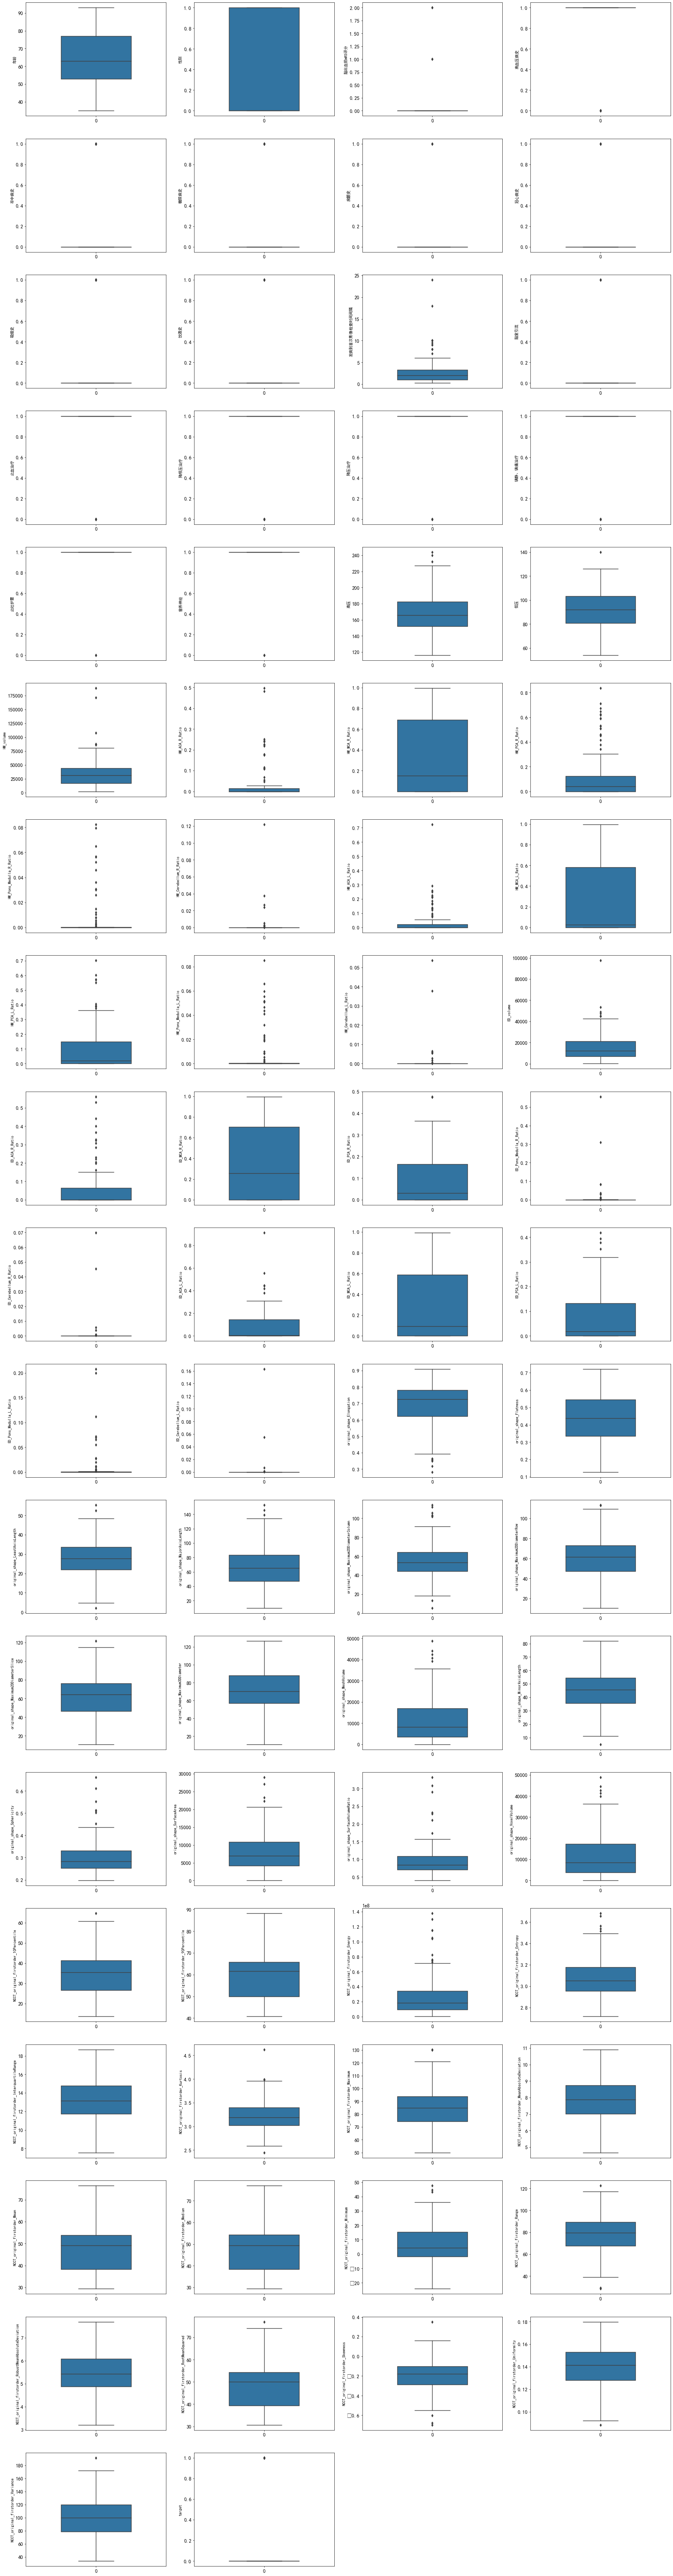

In [94]:
column=biao12.columns.tolist()
from matplotlib.font_manager import FontProperties
fig = plt.figure(figsize=(30, 120), dpi=70) # 设置绘图对象的尺寸
j=1
my_font = FontProperties(fname='SourceHanSansSC-Bold.otf')
plt.rc('font', family='SimHei', size=13)
for i in column:
    plt.subplot(19, 4, j) # 创建子图
    sns.boxplot(biao12[i], orient="v", width=0.5) # 绘制箱线图
    plt.ylabel(i, fontsize=10)
    j+=1
plt.show()

<h3>删除冗余值</h3>
     当